### Библиотеки

In [1]:
import pickle
from Experiment_Burgers_2_polynomial_linreg_FORCE import *

In [2]:
import sys
# sys.path.append(fr'/home/mex0/Documents/TukhbatullinAL/diplom_2/Git_stencil-net/Git_stencil-net/')
sys.path.append('D:\myProjects\diplom_2\GIT_stencil-net\GIT_stencil-net')

from utils import burgers_simulation,burgers_cd

In [3]:
BC_TYPE='dirichlet'; BC_VALUES=[0,0]

In [4]:
# ALGORITHM='rmsprop'

# ALGORITHM='adam_fromHighToLow'


ALGORITHM=''

### Описание эксперимента:

- Поиск конечно - разностной аналогии

### 0. Параметры для генерации данных

In [5]:
# folder='Experiment_burgers_2_polynomial_linreg_FORCE'

folder='Experiment_burgers_2_polynomial_linreg_6_FORCE'

In [6]:
device

device(type='cpu')

In [7]:
# epochs_lst=[10,100,1_000,5_000]
# epochs_lst=[30_000]
epochs_lst=[60_000]
# epochs_lst=[150_000]

new_epoch_lst=[None]
# new_epoch_lst=[60_000]
# new_epoch_lst=[150_000]

In [8]:
# для сил
np.random.seed(0)

L = 2.0*np.pi; T_ = 40;  Al = -0.1; Ar = 0.1; wl = -0.4; wr = 0.4; N = 20
A = np.zeros((N,)); w = np.zeros((N,)); phi = np.zeros((N,)); l = np.zeros((N,))

for k in range(0, N):
    A[k] = (Ar-Al)*np.random.rand(1) + Al
    w[k] = (wr-wl)*np.random.rand(1) + wl
    phi[k] = (2.0*np.pi)*np.random.rand(1)
    l[k] = np.random.randint(2, 5)

### 1. Генерация данных

In [9]:
# n = 256; Tsim = 80001;
# tau = 0.002

# n = 64; Tsim = 20001;
# tau=0.008

#GOOD
# n = 128; Tsim = 40001;
# tau=0.004

#GOOD
# n = 128; Tsim = 20001;
# tau=0.008

# n = 101; Tsim = 20001;
# tau=0.008

# Norm
# n = 256; Tsim = 16000;
# tau=0.01

# n = 256; Tsim = 16001;
# tau=0.01


# n = 256; Tsim = 8001;
# tau=0.01

n = 64; Tsim = 16001; tau=0.01; D=0.1

x_lst = np.linspace(0,L,n); h = x_lst[1] - x_lst[0]; #D = 0.02; 

CFL = (h*h)/(2.0*D)
print("CFL dt", CFL, "actual dt", tau)

CFL dt 0.04973345629170752 actual dt 0.01


In [10]:
# ##generate (by WENO + RK3)
# v_fact2, phase = burgers_simulation(Tsim, n, x_lst, D, tau, A, w, phi, l, N, L,bc_type=BC_TYPE,bc_values=BC_VALUES)

# ##save
# pickle.dump(v_fact, open(fr'{folder}/data/v_fact_n={n}_Tsim={Tsim}.pkl', 'wb'))
# pickle.dump(phase, open(fr'{folder}/data/phase_n={n}_Tsim={Tsim}.pkl', 'wb'))

##load
# v_fact=pickle.load( open(fr'{folder}/data/v_fact_n={n}_Tsim={Tsim}.pkl', 'rb'))
# phase=pickle.load( open(fr'{folder}/data/phase_n={n}_Tsim={Tsim}.pkl', 'rb'))

In [11]:
# ##generate (by UPWIND)
# v_fact = burgers_upwind(Tsim, n, x_lst, D, tau, A, w, phi, l, N, L,bc_type=BC_TYPE,bc_values=BC_VALUES)

#save
# pickle.dump(v_fact, open(fr'{folder}/data/v_fact_UPWIND_n={n}_Tsim={Tsim}.pkl', 'wb'))

##load
# v_fact=pickle.load( open(fr'{folder}/data/v_fact_UPWIND_n={n}_Tsim={Tsim}.pkl', 'rb'))

In [12]:
# ##generate (by CD)
# v_fact2 = burgers_cd(Tsim, n, x_lst, D, tau, A, w, phi, l, N, L,bc_type=BC_TYPE,bc_values=BC_VALUES)

#save
# pickle.dump(v_fact2, open(fr'{folder}/data/v_fact_CD_n={n}_Tsim={Tsim}.pkl', 'wb'))

##load
# v_fact=pickle.load( open(fr'{folder}/data/v_fact_CD_n={256}_Tsim={80001}.pkl', 'rb'))

v_fact=pickle.load( open(fr'{folder}/data/v_fact_CD_n={n}_Tsim={Tsim}_D={D}.pkl', 'rb'))

Text(0.5, 1.0, 'Фактические данные')

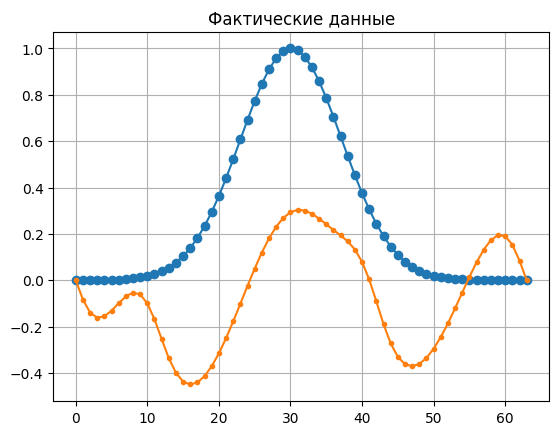

In [13]:
#view
plt.plot(v_fact[:,0],'o-')
plt.plot(v_fact[:,-1],'.-')
plt.grid()
plt.title('Фактические данные')

In [14]:
# #view
# for tn in [50,100,200,250,300,500,750,1000,2000,4000,6000,8000,-1]:
#     # tn=500
#     t1, t2=int(5*tn),int(1*tn)
#     print(t1,t2)
#     plt.figure()
#     plt.plot([i*L/256 for i in range(256)],v_fact[:,t1],'o-')
#     plt.plot([i*h for i in range(256)],v_fact2[:,t2],'.-')
#     plt.grid()
#     plt.title('Фактические данные')

In [15]:
print('h',h,h**2)
print('tau',tau)
assert tau/h<=1,'не выполнено ограничение на число Куранта'

h 0.09973310011396169 0.009946691258341505
tau 0.01


### 2. Сабсемплинг

In [16]:
t_factor = 1  # time subsample factor 
s_factor = 1  # space subsample factor

# t_factor = 20
# s_factor = 4

# t_factor = 20
# s_factor = 5

# t_factor = 5
# s_factor = 5

Tsim=len(v_fact[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=subsampling(s_factor,t_factor,h,tau,Tsim,n,v_fact,train_split=train_split)

full_sample (64, 16001)
train (64, 4000)
test (64, 12001)


In [17]:
tau/h

np.float64(0.10026761414789406)

In [18]:
(t_factor*tau)/(s_factor*h)

np.float64(0.10026761414789406)

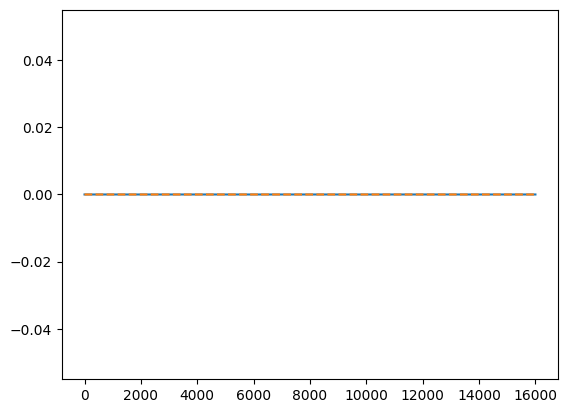

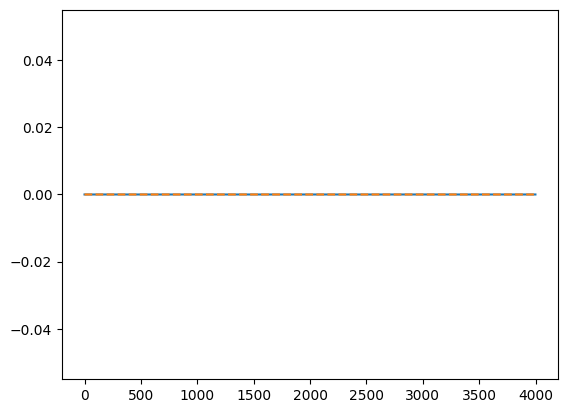

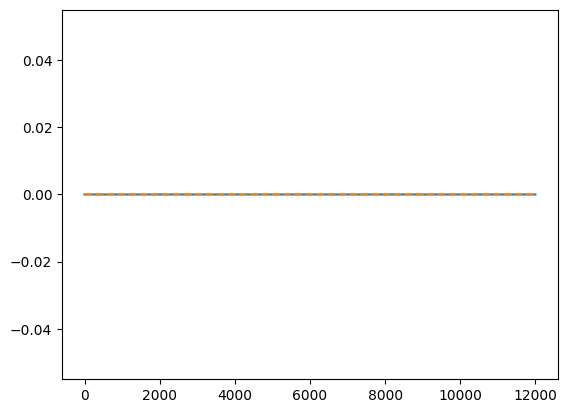

In [19]:
##check right point
plt.figure()
plt.plot(v_fact[0,:])
plt.plot(v_fact[-1,:],'--')

plt.figure()
plt.plot(v_coarse_train[0,:])
plt.plot(v_coarse_train[-1,:],'--')

plt.figure()
plt.plot(v_coarse_test[0,:])
plt.plot(v_coarse_test[-1,:],'--')

In [20]:
dxc==dtc, dxc

(np.False_, np.float64(0.09973310011396169))

Text(0.5, 1.0, 'Фактические данные после сабсемплинга')

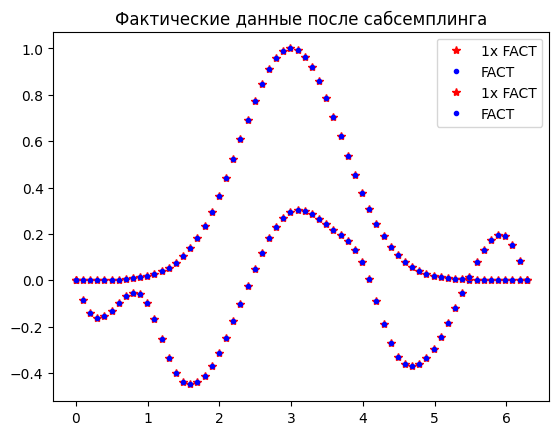

In [21]:
plt.figure()
time=0 #first time
plt.plot(x_lst[coarse_x],v_coarse[:,time],'*',color='red',label=str(s_factor) + 'x FACT')
plt.plot(x_lst,v_fact[:,t_factor*time],'.',color='blue',label='FACT')
time=v_coarse.shape[1]-1 #last time
plt.plot(x_lst[coarse_x],v_coarse[:,time],'*',color='red',label=str(s_factor) + 'x FACT')
plt.plot(x_lst,v_fact[:,t_factor*time],'.',color='blue',label='FACT')
plt.legend()
# plt.title(" Time slice at t=0 and t = " + str(time))
# plt.show()
plt.title('Фактические данные после сабсемплинга')

In [22]:
v_coarse_train.shape

(64, 4000)

In [23]:
lr

1.0

In [ ]:
assert 1==2, 'stop point'

### 3. Тренировка модели

In [24]:
from utils import forcing_terms

Fc, Fc_0p5, Fc_p1, Fc_0m5, Fc_m1 = forcing_terms(A, w, phi, l, L, Lxc, T_, Ltc, N, dtc)

# u_train = torch.tensor(v_coarse_train.T, requires_grad=True, dtype=torch.float, device=device)
fc      = torch.tensor(Fc.T, requires_grad=True, dtype=torch.float, device=device)
fc_0p5  = torch.tensor(Fc_0p5.T, requires_grad=True, dtype=torch.float, device=device)
fc_p1   = torch.tensor(Fc_p1.T, requires_grad=True, dtype=torch.float, device=device)
fc_0m5  = torch.tensor(Fc_0m5.T, requires_grad=True, dtype=torch.float, device=device)
fc_m1   = torch.tensor(Fc_m1.T, requires_grad=True, dtype=torch.float, device=device)

In [ ]:
# lr=10

lr

In [ ]:

for i in range(len(epochs_lst)):
    epoch=epochs_lst[i]
    if new_epoch_lst==[None]:
        print('starting study')
        net, loss_lst,loss=train_net(MLPConv,v_coarse_train,epoch,dtc,
                    fs,
                    neurons,
                    hidden_layers_num,
                    lr,
                    m,
                    has_backward,
                    method,
                    decay_const,
                    force_terms=[fc,fc_0p5,fc_p1,fc_0m5,fc_m1],
                    bc_type=BC_TYPE,bc_values=BC_VALUES,
                    verbose=True,
                    verbose_step=1000,
                    continue_fitting=None)
        pickle.dump(net, open(fr'{folder}/models/net_epochs={epoch}_device={device}', 'wb'))
    else:
        print('continue study')
        new_epoch=new_epoch_lst[i]
        net = pickle.load(open(fr'{folder}/models/net_epochs={epoch}_device={device}', 'rb'))
        net, loss_lst,loss=train_net(MLPConv,v_coarse_train,new_epoch-epoch,dtc,
                    fs,
                    neurons,
                    hidden_layers_num,
                    lr,
                    m,
                    has_backward,
                    method,
                    decay_const,
                    force_terms=[fc,fc_0p5,fc_p1,fc_0m5,fc_m1],
                    bc_type=BC_TYPE,bc_values=BC_VALUES,
                    verbose=True,
                    verbose_step=1000,
                    continue_fitting=[net,new_epoch])
        
        pickle.dump(net, open(fr'{folder}/models/cf_net_epochs={new_epoch}_device={device}', 'wb'))

In [ ]:
if new_epoch_lst!=[None]:
    epochs_lst=new_epoch_lst

In [ ]:
net.layer[-1].weight

In [ ]:
h, tau, D

In [ ]:
assert 1==2, 'stop point'

### 4. Симуляция прогноза моделью

In [ ]:
# my_pred=torch.tensor(v_coarse[:,0])+tau*net(torch.tensor(v_coarse[:,0],dtype=torch.float,device=device))

# plt.plot(v_coarse[:,0],'-*')
# plt.plot(v_coarse[:,1],'--')

# plt.plot(my_pred.detach().numpy(),color='cyan')

In [25]:
epochs_lst

[60000]

In [ ]:
NN_sim_lst=[]

weights=[]
biases=[]

for epochs in epochs_lst:
    
    net = pickle.load(open(fr'{folder}/models/net_epochs={epochs}_device={device}', 'rb'))
    # NN_sim,T_sim,x_sim=make_simulation(net,v_coarse,L,Lxc,dtc,method=method,
                                              # bc_type=BC_TYPE,bc_values=BC_VALUES)
    NN_sim,T_sim,x_sim=make_simulation_forcing(net,v_coarse[:,:],L,Lxc,dtc,\
                                              A,phi,N,w,l,method=method,
                                              bc_type=BC_TYPE,bc_values=BC_VALUES)
    
    NN_sim_lst.append(NN_sim)
    
    try:
        weights.append(net.layer[0].weight.data.numpy())
    except:
        weights.append(net.layer[0].weight.cpu().data.numpy())
        
    biases.append(None)

E1


 27%|██▋       | 4345/16000 [00:00<00:02, 5347.57it/s]

In [ ]:
pickle.dump(NN_sim,open(fr'{folder}/data/NN_sim_{epochs}_{n}_{Tsim}.pkl','wb'))

In [ ]:
v_coarse.shape

In [ ]:
if len(weights[0][0])==9:
    coef_name=['u_l','u','u_r','u_l*u','u^2','u_r*u','u_l^2','u_r^2','u_r*r_l']
    true_coeffs=[D/h/h/s_factor/s_factor,-2*D/h/h/s_factor/s_factor,
                D/h/h/s_factor/s_factor,0.0,0.0,0.0,1/2/h/s_factor,-1/2/h/s_factor,0.0]
    true_coeffs_df=pd.DataFrame({'coef_name':coef_name,'true_coef_value':true_coeffs})
    for i in range(len(epochs_lst)):
        true_coeffs_df[fr'epoch={epochs_lst[i]}']=weights[i][0]
    display(true_coeffs_df)

elif len(weights[0][0])==6:

    coef_name=['u_l','u','u_r','u^2','u_l^2','u_r^2']
    true_coeffs=[D/h/h/s_factor/s_factor,-2*D/h/h/s_factor/s_factor,
                D/h/h/s_factor/s_factor,0,1/2/h/s_factor,-1/2/h/s_factor]
    true_coeffs_df=pd.DataFrame({'coef_name':coef_name,'true_coef_value':true_coeffs})
    for i in range(len(epochs_lst)):
        true_coeffs_df[fr'epoch={epochs_lst[i]}']=weights[i][0]
    display(true_coeffs_df)

In [ ]:
print(np.round(true_coeffs_df['true_coef_value'],3).to_list())

In [ ]:
print(np.round(true_coeffs_df['epoch=60000'],3).to_list())

In [ ]:
net.layer[0].weight[0]

In [ ]:
# s_factor=5
# t_factor=25
# coef_name=['u_l','u','u_r','u_l*u','u^2','u_r*u','u_l^2','u_r^2','u_r*r_l']
# true_coeffs=[D/h/h/s_factor/s_factor,-2*D/h/h/s_factor/s_factor,
#              D/h/h/s_factor/s_factor,0.0,0.0,0.0,1/2/h/s_factor,-1/2/h/s_factor,0.0]
# true_coeffs_df=pd.DataFrame({'coef_name':coef_name,'true_coef_value':true_coeffs})

In [ ]:
tau/h/h

In [ ]:
t_factor*tau/h/h/(s_factor*s_factor)

In [ ]:
for i in true_coeffs:
    print(i)

In [ ]:
# pd.DataFrame({'epoch':epochs_lst+[['finite_diff_methods']],
#               'coefs':weights+[true_coeffs],
#               'bias':biases+[[None]]})

In [ ]:
print(dxc)

### 5. Результаты

In [ ]:
T=round(T_sim*dtc,3)
T

In [ ]:
# err=np.abs(v_coarse[:,:]-NN_sim)
# mae_list=[err[:,i].mean() for i in range(err.shape[1])]
# mae_df=pd.DataFrame({'method':method,'mae_list':mae_list}).to_csv(fr'{method}_mae.csv')

In [ ]:
net.layer[0].weight

In [ ]:

for i in range(len(epochs_lst)):
    
    print(fr'---------------Epochs = {epochs_lst[i]}-------------------')
    # view_results(T_sim,x_sim,NN_sim_lst[i],v_coarse[:,:],T,dtc,n=11,fix_axes=True,
    #             epochs=epochs_lst[i],
    #             save_path = fr'{folder}/graphs/',
    #             save_name = fr'Result_epoch={epochs_lst[i]}',
    #             view_flag=False)
    view_result_metric(NN_sim_lst[i],v_coarse[:,:],T,dtc,L,dxc,
                       n_xticks=2000,
                       save_path = fr'{folder}/graphs/',
                save_name = fr'Metric_epoch={epochs_lst[i]}')

    view_result_imshow(NN_sim_lst[i],v_coarse[:,:],T,dtc,L,dxc,
                       figsize=(10,5),aspect=100,n_xticks=2001,n_yticks=10,
                       save_path = fr'{folder}/graphs/',
                       save_name = fr'Imshow_epoch={epochs_lst[i]}',
                       fix_colorbar_axes=False,
                       colorbar_min_max=[-0.1,1.1],cmap='seismic'
                       )
    
    # make_gif(folder=fr'{folder}/graphs/',epochs=epochs_lst[i])

    # make_gif(folder=fr'{folder}/graphs/',epochs=epochs_lst[i],format='mp4')

    make_subplot_graphs(NN_sim_lst[i], v_coarse, x_sim, T_sim, T, dtc,16,nx=4,ny=4,
                        figsize=(20,20),
                        save_flg=True,
                        save_path = fr'{folder}/graphs/',
                        save_name=fr'SUBPLOT_{epochs_lst[i]}')

    print('\n')
print('done')

In [ ]:
has_backward

In [ ]:
make_subplot_graphs(NN_sim_lst[i], v_coarse, x_sim, T_sim, T, dtc,100,nx=10,ny=10,
                        figsize=(30,30),
                        save_flg=False,
                        save_path = fr'{folder}/graphs_{ALGORITHM}/',
                        save_name=fr'SUBPLOT_{epochs_lst[i]}')

In [ ]:
for j in range(T_sim):
    temp=NN_sim_lst[0][:,j]-v_coarse[:,j]

    if max(temp)>0.3:
        print(j)

In [ ]:
plt.plot(NN_sim_lst[0][:,104],label='net')
plt.plot(v_coarse[:,104],label='fact')
plt.legend()
plt.title(104)
plt.grid()

In [ ]:
v_coarse.shape

### RK3_mae vs E1_mae

In [ ]:
# rk3_mae=pd.read_csv(fr'RK3_mae.csv')
# e1_mae=pd.read_csv(fr'E1_mae.csv')
# plt.plot(rk3_mae['mae_list'],label='RK3')
# plt.plot(e1_mae['mae_list'],label='E1')
# plt.grid()
# plt.legend()